# Classification Task

In [47]:
# Importing necessary library
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Set the seaborn visualization style
sns.set()

In [48]:
#import os
#print("Current Working Directory:", 
#os.getcwd()
#print("Python Path:", sys.path)

# Read the dataset

In [49]:
import yfinance as yf
ticker = 'BAJFINANCE.NS'
#df = yf.download(ticker, period='2y')
df = yf.download(ticker, start='2021-01-17', end='2025-01-17')

[*********************100%***********************]  1 of 1 completed


In [50]:
# Make the copy of the data. We will work on the copied data.
data = df.copy()

In [51]:
# Inspect the data
data.head()

Price,Close,High,Low,Open,Volume
Ticker,BAJFINANCE.NS,BAJFINANCE.NS,BAJFINANCE.NS,BAJFINANCE.NS,BAJFINANCE.NS
Date,,,,,
2021-01-18,4651.920898,4809.765885,4618.557979,4799.909808,3703413
2021-01-19,4887.776855,4923.061904,4683.608295,4696.519853,4767465
2021-01-20,4910.248047,4960.168976,4830.462918,4896.498628,3314707
2021-01-21,5044.636230,5149.800776,4918.182942,4921.139765,7061809
2021-01-22,4900.983887,5063.067282,4874.422045,5061.096067,3084796


In [52]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BAJFINANCE.NS,BAJFINANCE.NS,BAJFINANCE.NS,BAJFINANCE.NS,BAJFINANCE.NS
Date,,,,,
2025-01-10,7288.049805,7367.049805,7245.049805,7277.450195,808963
2025-01-13,7150.950195,7255.100098,7134.000000,7240.000000,664274
2025-01-14,7335.000000,7388.000000,7191.149902,7230.000000,998011
2025-01-15,7177.399902,7350.000000,7105.200195,7340.500000,681750
2025-01-16,7259.750000,7289.000000,7194.049805,7200.000000,860849


In [53]:
# Check the shape of the data
data.shape

(988, 5)

# Generate Target Values

In [54]:
# Generate log returns
data['returns'] = np.log(data['Close'] / data['Close'].shift(1))

In [55]:
# Create target values
data['target'] = np.where(data.returns.shift(-1) > 0, 1, 0)

In [56]:
# Count the values in the target column
data['target'].value_counts()

1    504
0    484
Name: target, dtype: int64

In [57]:
features = ['Volume', 'returns']
label = 'target'

# Feature Selection



In [58]:
data['target'].value_counts()

1    504
0    484
Name: target, dtype: int64

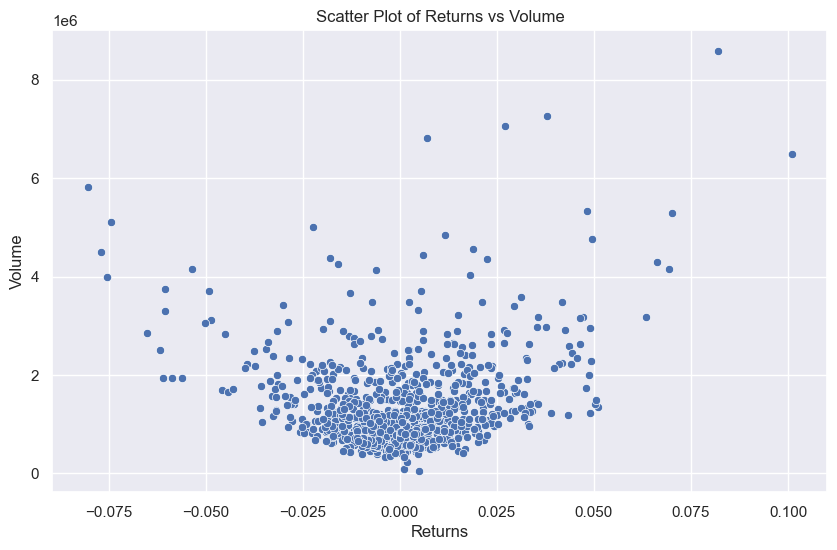

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot using the correct MultiIndex column for Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['returns'], y=data[('Volume', 'BAJFINANCE.NS')])
plt.xlabel('Returns')
plt.ylabel('Volume')
plt.title('Scatter Plot of Returns vs Volume')
plt.show()

# Feature Extraction

Our intuition says that only these two features might not be able to capture the intricacies of the stock movement. We need more features. What we can do to generate more features? The answer is, create or extract new features based on the existing ones.

Let's try to create new features. We will consider the following quantitative features.

    Rolling standard deviation
    Rolling moving average of close price
    Rolling percentage change
    Rolling moving average of volume
    Difference between close and open



In [60]:
# Creating features
features_list = []

# SD based features
for i in range(5, 20, 5):
    col_name = 'std_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).std()
    features_list.append(col_name)
    
# MA based features
for i in range(10, 30, 5):
    col_name = 'ma_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).mean()
    features_list.append(col_name)
    
# Daily pct change based features
for i in range(3, 12, 3):
    col_name = 'pct_' + str(i)
    data[col_name] = data['Close'].pct_change().rolling(i).sum()
    features_list.append(col_name)
    
# Feature based on volume
col_name = 'vma_4'
data[col_name] = data['Volume'].rolling(4).mean()
features_list.append(col_name)

# Intraday movement
col_name = 'co'
data[col_name] = data['Close'] - data['Open']
features_list.append(col_name)

In [61]:
features_list

['std_5',
 'std_10',
 'std_15',
 'ma_10',
 'ma_15',
 'ma_20',
 'ma_25',
 'pct_3',
 'pct_6',
 'pct_9',
 'vma_4',
 'co']

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 988 entries, 2021-01-18 to 2025-01-16
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (Close, BAJFINANCE.NS)   988 non-null    float64
 1   (High, BAJFINANCE.NS)    988 non-null    float64
 2   (Low, BAJFINANCE.NS)     988 non-null    float64
 3   (Open, BAJFINANCE.NS)    988 non-null    float64
 4   (Volume, BAJFINANCE.NS)  988 non-null    int64  
 5   (returns, )              987 non-null    float64
 6   (target, )               988 non-null    int32  
 7   (std_5, )                984 non-null    float64
 8   (std_10, )               979 non-null    float64
 9   (std_15, )               974 non-null    float64
 10  (ma_10, )                979 non-null    float64
 11  (ma_15, )                974 non-null    float64
 12  (ma_20, )                969 non-null    float64
 13  (ma_25, )                964 non-null    float64
 14  (pct_3,

In [63]:
data.isna().sum()

Price    Ticker       
Close    BAJFINANCE.NS     0
High     BAJFINANCE.NS     0
Low      BAJFINANCE.NS     0
Open     BAJFINANCE.NS     0
Volume   BAJFINANCE.NS     0
returns                    1
target                     0
std_5                      4
std_10                     9
std_15                    14
ma_10                      9
ma_15                     14
ma_20                     19
ma_25                     24
pct_3                      3
pct_6                      6
pct_9                      9
vma_4                      3
co                         0
dtype: int64

In [64]:
# Removing nan values
data.dropna(inplace=True)

In [65]:
data[features_list + ['target']].head()

Price,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co,target
Ticker,,,,,,,,,,,,,
Date,,,,,,,,,,,,,
2021-02-22,153.030649,138.903240,166.564011,5490.239551,5431.585938,5274.016797,5195.036074,-0.058637,-0.035304,-0.002791,2352231.75,-101.665347,1
2021-02-23,134.644284,141.175258,144.042512,5488.603467,5445.417318,5297.424976,5221.207910,-0.032508,-0.070319,-0.015517,2313194.25,-35.777370,1
2021-02-24,90.880334,137.556992,122.260270,5497.178174,5466.299023,5332.803345,5245.010312,0.012533,-0.033643,0.001123,2211014.75,117.188658,0
2021-02-25,84.108969,138.343505,121.838502,5493.521582,5467.948275,5368.270435,5266.614863,0.028636,-0.030000,-0.006668,1921049.50,-70.027239,0
2021-02-26,120.387313,168.458289,141.581295,5462.716406,5449.967546,5394.406323,5272.394473,-0.020567,-0.053075,-0.090887,2349240.25,-162.723946,1


# Generate Training & Testing Datasets

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train , X_test, y_train, y_test = train_test_split(data[features_list].iloc[:-1],
                                                    data.iloc[:-1]['target'],
                                                    test_size= 0.25, 
                                                    shuffle=False)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((722, 12), (722,), (241, 12), (241,))

# Define a Model

In [68]:
# Import necessary packages
from sklearn.tree import DecisionTreeClassifier

In [69]:
# Create a model
model = DecisionTreeClassifier(max_depth=3, random_state=1)

In [70]:
# model = DecisionTreeClassifier(class_weight=None, 
#                                criterion='gini', 
#                                max_depth=3,
#                                max_features=None, 
#                                max_leaf_nodes=None,
#                                min_samples_leaf=5,
#                                min_samples_split=2,
#                                min_weight_fraction_leaf=0.0, 
#                                random_state=None, 
#                                splitter='best')

# Train the Model

In [71]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

# Predict using the Training Model

In [72]:
# Predict on a train dataset
y_pred_train = model.predict(X_train)

In [73]:
print('Model accuracy on training data:', model.score(X_train, y_train))

Model accuracy on training data: 0.6024930747922438


In [74]:
# Predict on a test dataset
y_pred = model.predict(X_test)

In [75]:
print('Model accuracy on testing data:', model.score(X_test, y_test))

Model accuracy on testing data: 0.5601659751037344


In [76]:
model.predict_proba(X_test)

array([[0.2295082 , 0.7704918 ],
       [0.2295082 , 0.7704918 ],
       [0.61428571, 0.38571429],
       [0.2295082 , 0.7704918 ],
       [0.2295082 , 0.7704918 ],
       [0.52777778, 0.47222222],
       [0.61428571, 0.38571429],
       [0.2295082 , 0.7704918 ],
       [0.2295082 , 0.7704918 ],
       [0.61428571, 0.38571429],
       [0.2295082 , 0.7704918 ],
       [0.61428571, 0.38571429],
       [0.2295082 , 0.7704918 ],
       [0.44475921, 0.55524079],
       [0.44475921, 0.55524079],
       [0.61428571, 0.38571429],
       [0.44475921, 0.55524079],
       [0.44475921, 0.55524079],
       [0.44475921, 0.55524079],
       [0.44475921, 0.55524079],
       [0.44475921, 0.55524079],
       [0.44475921, 0.55524079],
       [0.44475921, 0.55524079],
       [0.61428571, 0.38571429],
       [0.2295082 , 0.7704918 ],
       [0.61428571, 0.38571429],
       [0.61428571, 0.38571429],
       [0.61428571, 0.38571429],
       [0.2295082 , 0.7704918 ],
       [0.2295082 , 0.7704918 ],
       [0.

# Evaluate the Model

In [77]:
# Another method to calculate accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy on training data:', accuracy_score(y_train, y_pred_train))
print('Model accuracy on testing data:', accuracy_score(y_test, y_pred))

Model accuracy on training data: 0.6024930747922438
Model accuracy on testing data: 0.5601659751037344


In [78]:
# Importing necessary packages
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
# Printing the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[47 66]
 [40 88]]


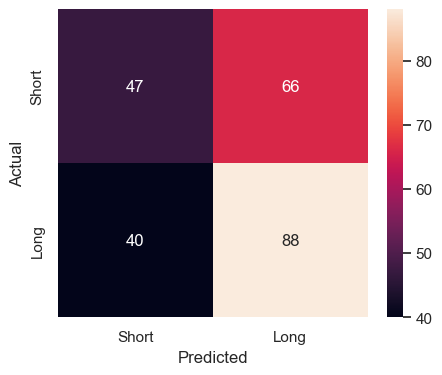

In [80]:
# Plotting the Confustion matrix
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm, index=['Short', 'Long'], columns=['Short', 'Long'])
plt.figure(figsize=(5, 4))
sns.heatmap(df, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [81]:
# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.42      0.47       113
           1       0.57      0.69      0.62       128

    accuracy                           0.56       241
   macro avg       0.56      0.55      0.55       241
weighted avg       0.56      0.56      0.55       241



# Visualize a tree

In [82]:
from sklearn.tree import plot_tree

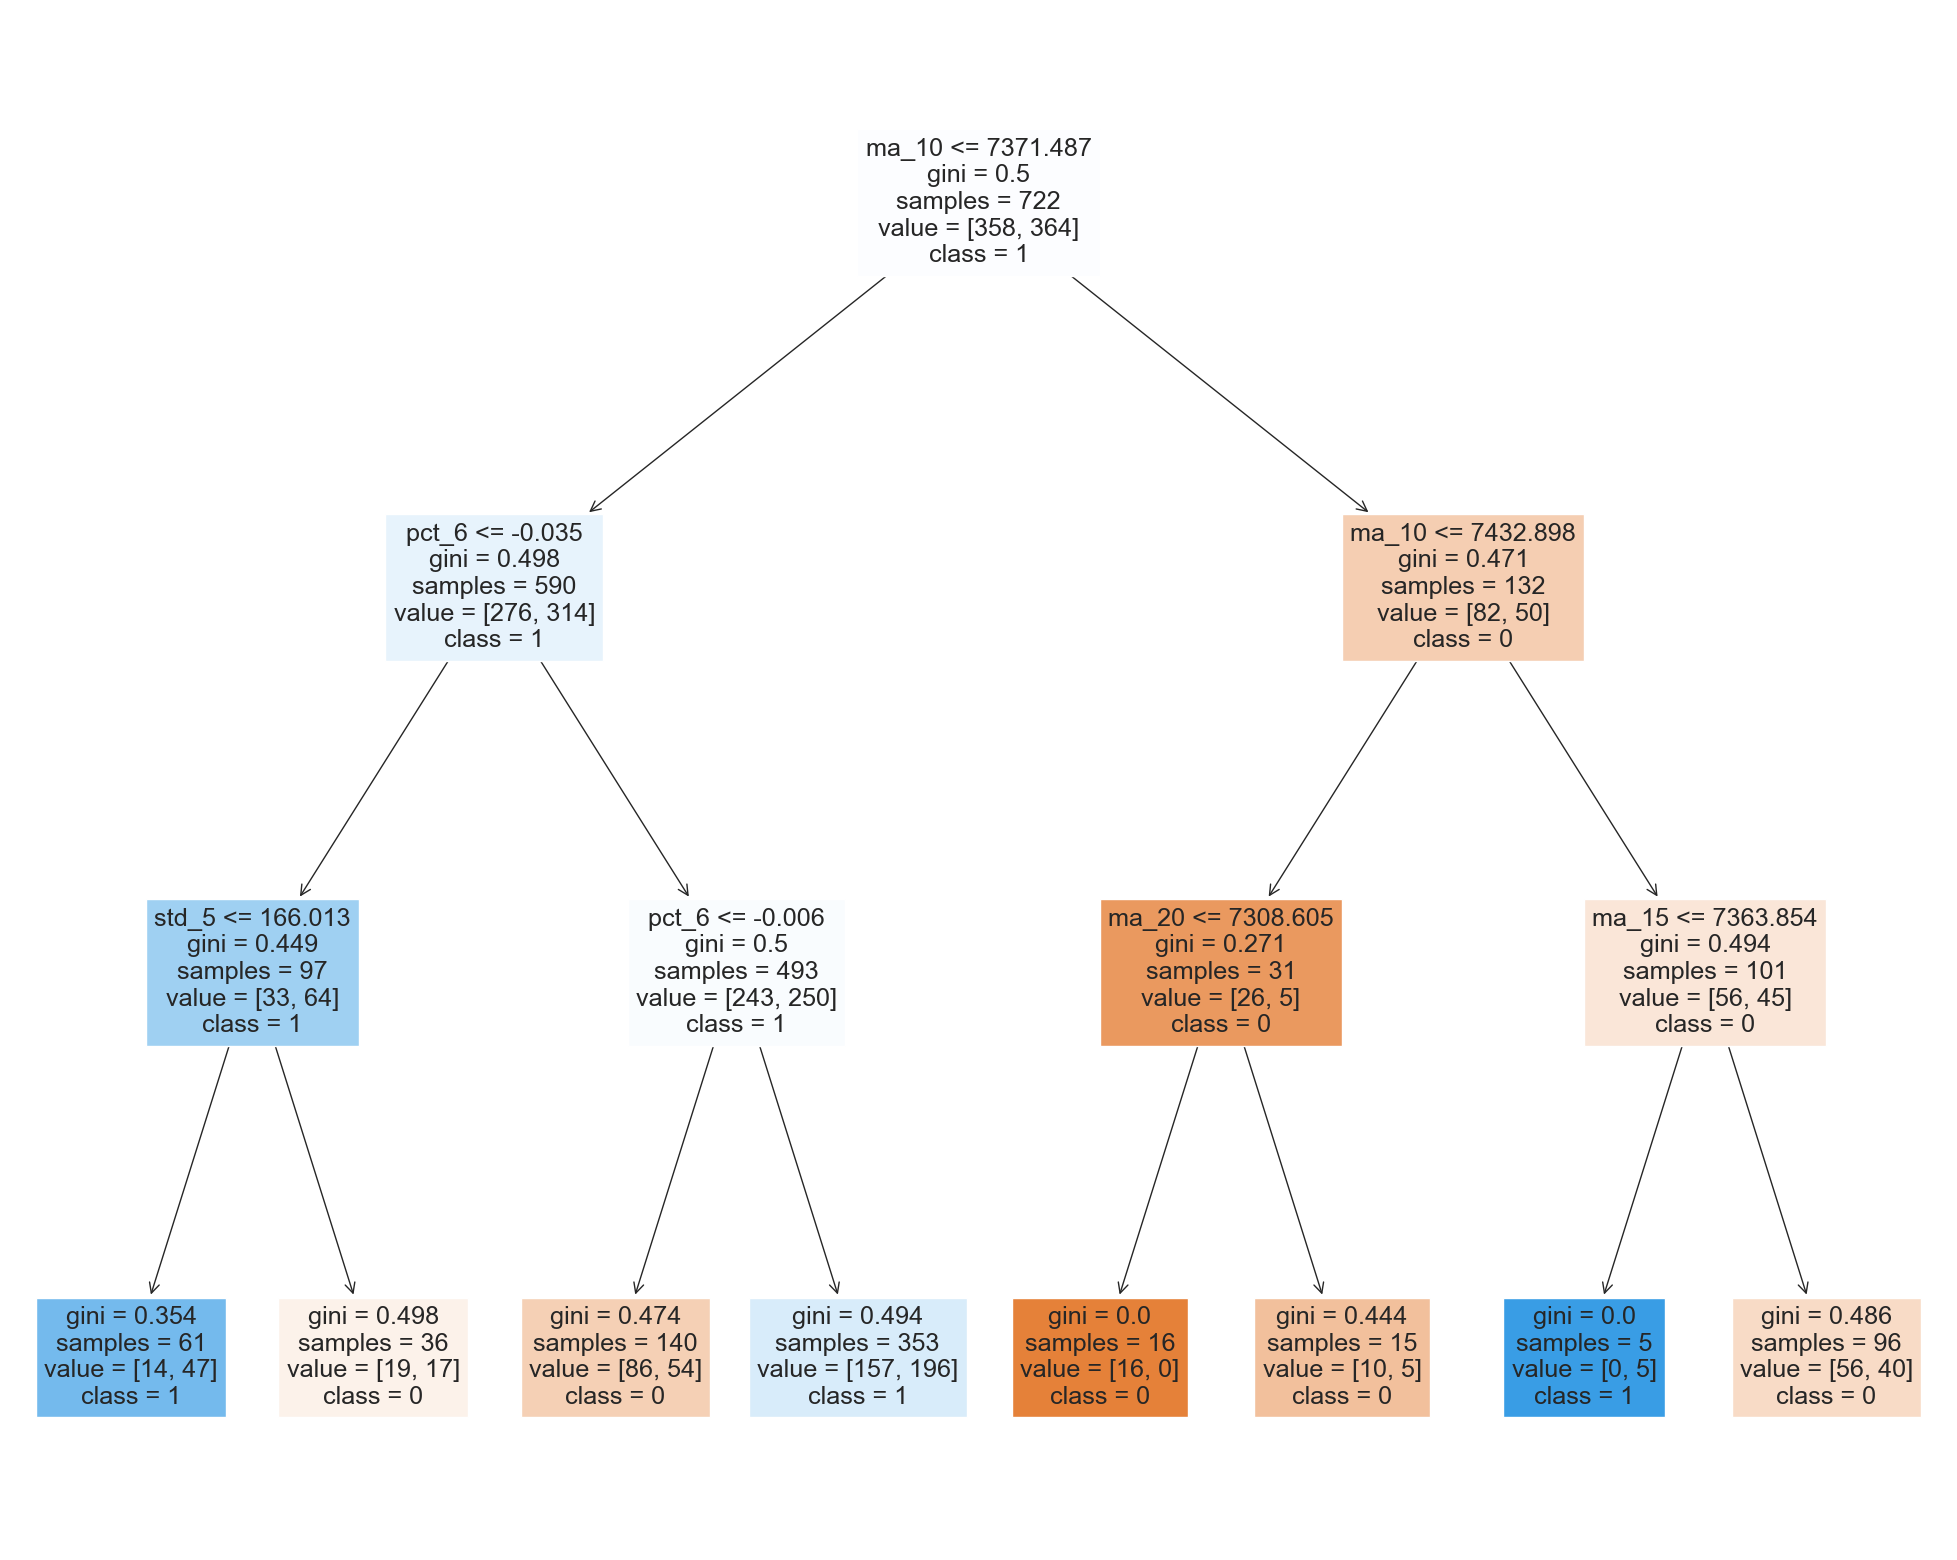

In [83]:
fig = plt.figure(figsize=(25,20))

_ = plot_tree(model, 
              feature_names=features_list,
              class_names=['0','1'],
              filled=True)

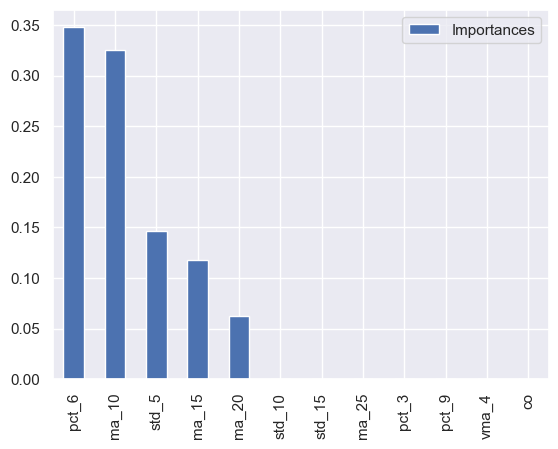

In [84]:
plot_df = pd.DataFrame({"Importances": model.feature_importances_}, index=features_list)
plot_df.sort_values('Importances', ascending=False).plot.bar();

# Random Forest Model

In [85]:
# From required libraries
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Define a model
model = RandomForestClassifier(n_estimators=20, 
                               max_depth=3,
                               max_leaf_nodes=5, 
                               random_state=1, 
                               max_features=5, 
                               min_samples_leaf=1)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=5, max_leaf_nodes=5,
                       n_estimators=20, random_state=1)

In [87]:
# Predict on a train dataset
y_pred_train = model.predict(X_train)

In [88]:
print('Model accuracy on training data:', model.score(X_train, y_train))

Model accuracy on training data: 0.6385041551246537


In [89]:
# Predict on a test dataset
y_pred = model.predict(X_test)

In [90]:
print('Model accuracy on testing data:', model.score(X_test, y_test))

Model accuracy on testing data: 0.5684647302904564


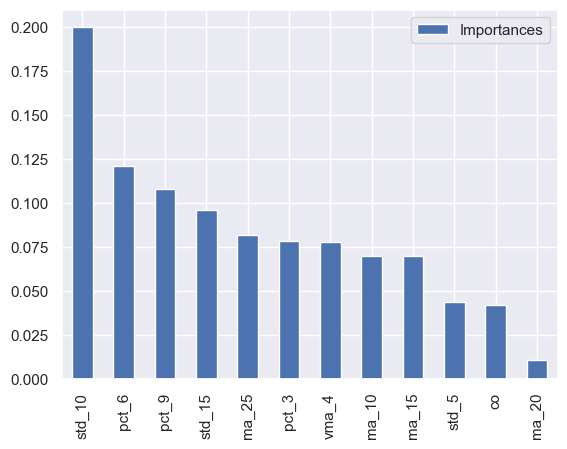

In [91]:
imp_features = model.feature_importances_

plot_df = pd.DataFrame({"Importances": imp_features}, index=features_list)
plot_df.sort_values('Importances', ascending=False).plot.bar();

Model accuracy on testing data: 0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.54       113
           1       0.59      0.60      0.60       128

    accuracy                           0.57       241
   macro avg       0.57      0.57      0.57       241
weighted avg       0.57      0.57      0.57       241



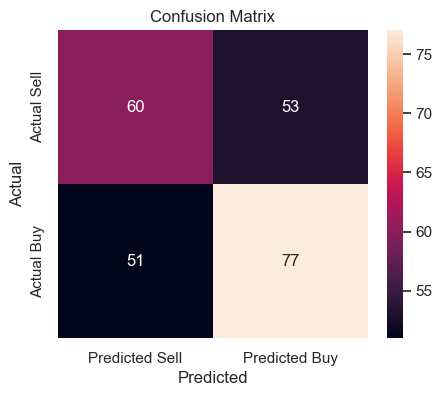


Generated Trading Signals:
            Actual  Predicted Signal
Date                                
2024-11-04       1          1    Buy
2024-11-05       1          0   Sell
2024-11-06       0          0   Sell
2024-11-07       0          0   Sell
2024-11-08       0          0   Sell
2024-11-11       0          0   Sell
2024-11-12       0          0   Sell
2024-11-13       0          1    Buy
2024-11-14       1          1    Buy
2024-11-18       1          1    Buy
2024-11-19       0          1    Buy
2024-11-21       1          1    Buy
2024-11-22       1          1    Buy
2024-11-25       0          1    Buy
2024-11-26       1          1    Buy
2024-11-27       0          0   Sell
2024-11-28       1          0   Sell
2024-11-29       1          0   Sell
2024-12-02       1          0   Sell
2024-12-03       1          1    Buy
2024-12-04       1          1    Buy
2024-12-05       0          1    Buy
2024-12-06       1          1    Buy
2024-12-09       1          1    Buy
2024-12-10

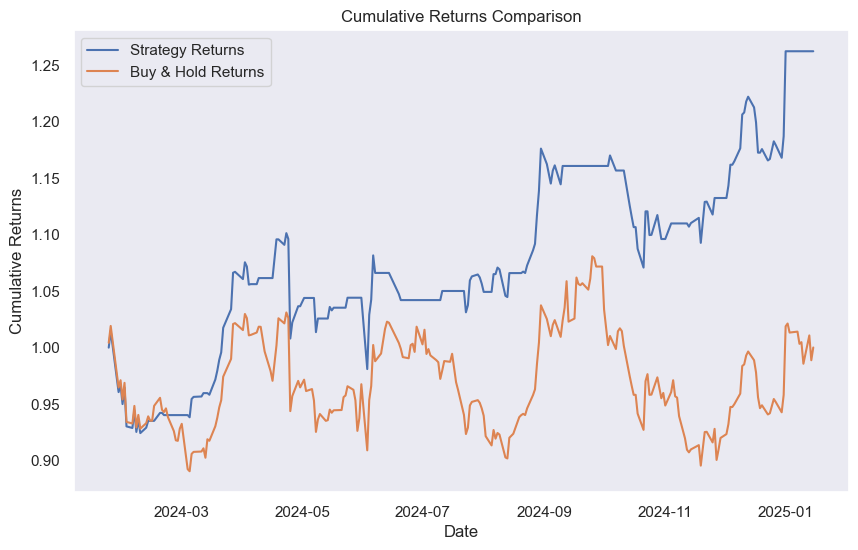


Strategy Performance Metrics:
Total Strategy Return: 26.24%
Total Buy & Hold Return: 0.01%
Signal Accuracy (Hit Rate): 56.85%
Number of Buy Signals: 130
Number of Sell Signals: 111


In [92]:
# Import necessary packages
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test dataset
y_pred = model.predict(X_test)

# Generate trading signals (1 = Buy, 0 = Sell)
# Since the model predicts 1 if next day's return is positive (buy) and 0 if negative (sell)
signals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=X_test.index)
signals['Signal'] = signals['Predicted'].apply(lambda x: 'Buy' if x == 1 else 'Sell')

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy on testing data: {accuracy:.2f}')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm, index=['Actual Sell', 'Actual Buy'], columns=['Predicted Sell', 'Predicted Buy'])
plt.figure(figsize=(5, 4))
sns.heatmap(df, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display the signals
print("\nGenerated Trading Signals:")
print(signals.tail(50))  # Show last 50 signals

# Optional: Add actual returns to the signals dataframe for comparison
signals['Actual_Return'] = data['returns'].shift(-1)[signals.index]
signals['Correct'] = signals['Actual'] == signals['Predicted']

# Calculate strategy performance
signals['Strategy_Return'] = signals['Actual_Return'] * signals['Predicted']
signals['Cumulative_Strategy_Return'] = (1 + signals['Strategy_Return']).cumprod()
signals['Cumulative_Buy_Hold_Return'] = (1 + signals['Actual_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(signals['Cumulative_Strategy_Return'], label='Strategy Returns')
plt.plot(signals['Cumulative_Buy_Hold_Return'], label='Buy & Hold Returns')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

# Print performance metrics
total_strategy_return = signals['Cumulative_Strategy_Return'].iloc[-1] - 1
total_buy_hold_return = signals['Cumulative_Buy_Hold_Return'].iloc[-1] - 1
hit_rate = signals['Correct'].mean()

print(f"\nStrategy Performance Metrics:")
print(f"Total Strategy Return: {total_strategy_return:.2%}")
print(f"Total Buy & Hold Return: {total_buy_hold_return:.2%}")
print(f"Signal Accuracy (Hit Rate): {hit_rate:.2%}")
print(f"Number of Buy Signals: {(signals['Predicted'] == 1).sum()}")
print(f"Number of Sell Signals: {(signals['Predicted'] == 0).sum()}")